<a href="https://colab.research.google.com/github/Sahib61003/Covid_19_Pollutant_Analysis/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('dataforpaper.csv')

In [ ]:
df.head()

,Date,Confirmed,Deceased,Recovered,Grand Total,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3)
0,14-Mar-20,7,1,1,9,29.18,74.45,7.33,56.96,28.10,7.20,0.75
1,15-Mar-20,0,0,1,1,56.48,128.62,1.90,67.38,27.76,28.07,0.82
2,16-Mar-20,0,0,0,0,63.54,137.5,7.93,60.44,38.28,9.23,0.89
3,17-Mar-20,1,0,0,1,69.45,147.36,14.18,59.67,34.46,4.10,0.98
4,18-Mar-20,2,0,0,2,65.35,140.79,13.20,64.22,29.40,7.85,0.91


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           587 non-null    object 
 1   Confirmed      587 non-null    int64  
 2   Deceased       587 non-null    int64  
 3   Recovered      587 non-null    int64  
 4   Grand Total    587 non-null    int64  
 5   PM2.5 (ug/m3)  587 non-null    object 
 6   PM10 (ug/m3)   587 non-null    object 
 7   NO (ug/m3)     587 non-null    float64
 8   NO2 (ug/m3)    587 non-null    float64
 9   NH3 (ug/m3)    587 non-null    float64
 10  SO2 (ug/m3)    579 non-null    float64
 11  CO (mg/m3)     587 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 55.2+ KB


<ipython-input-5-9a5fe3d6050d>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


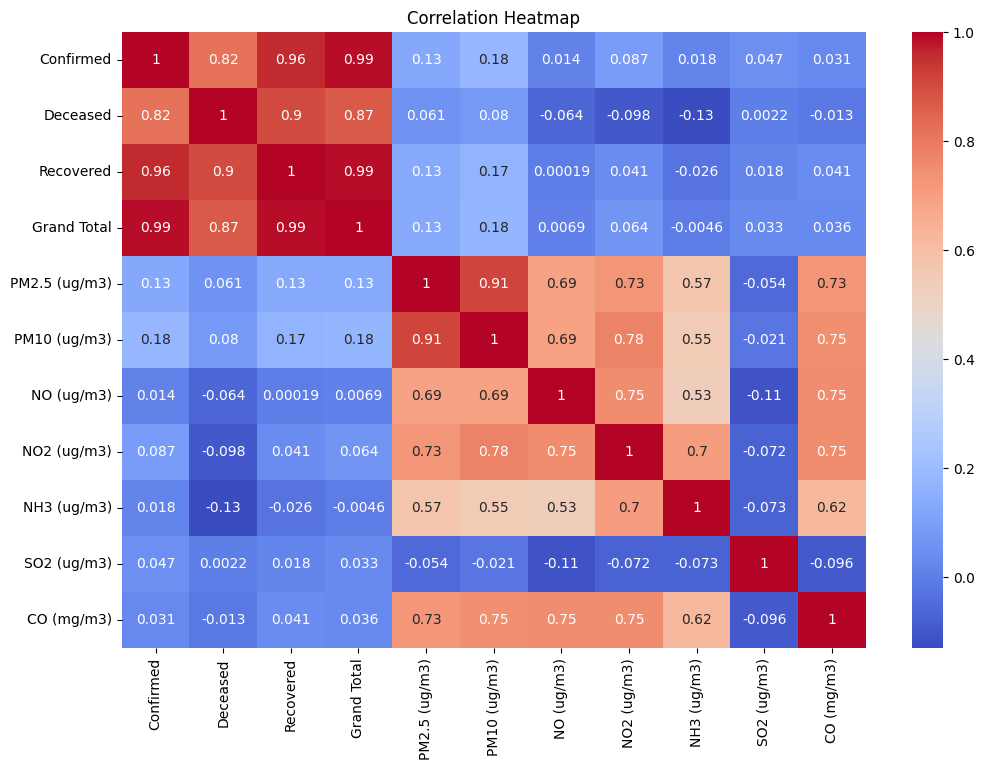

Mean Squared Error: 17360996.014473394


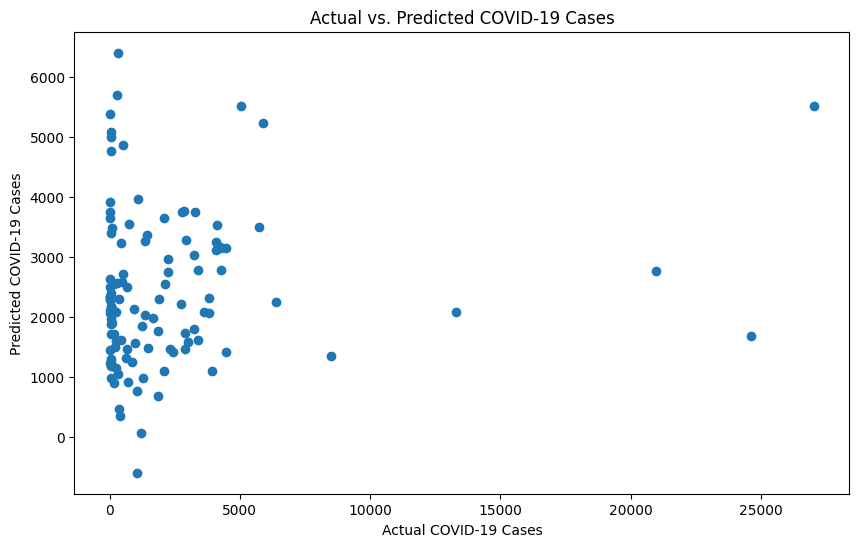

Coefficient Values:
PM2.5 (ug/m3)     -1.646066
PM10 (ug/m3)      16.851580
NO (ug/m3)       -21.443622
NO2 (ug/m3)       24.604170
NH3 (ug/m3)      -44.594799
SO2 (ug/m3)        6.046700
CO (mg/m3)      -938.626643
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('dataforpaper.csv')

# Convert date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Data preprocessing: Handling missing values and converting object columns to numeric
data['PM2.5 (ug/m3)'] = pd.to_numeric(data['PM2.5 (ug/m3)'], errors='coerce')
data['PM10 (ug/m3)'] = pd.to_numeric(data['PM10 (ug/m3)'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Select relevant columns for analysis
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

# Split the data into features (pollutants) and target (COVID-19 cases)
X = data[pollutants]
y = data['Confirmed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs. predicted COVID-19 cases
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual COVID-19 Cases")
plt.ylabel("Predicted COVID-19 Cases")
plt.title("Actual vs. Predicted COVID-19 Cases")
plt.show()

# Print the coefficients of the model to see pollutant impact
coefficients = pd.Series(model.coef_, index=pollutants)
print("Coefficient Values:")
print(coefficients)

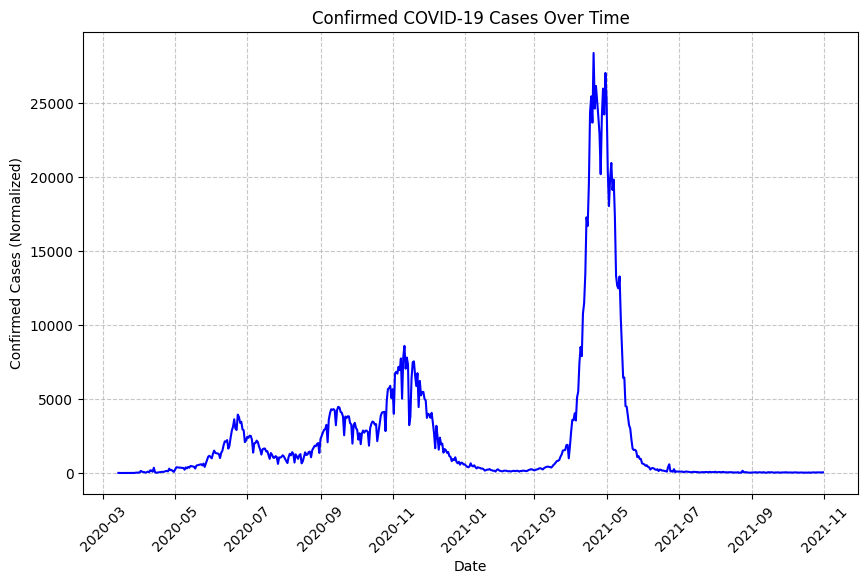

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Confirmed'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (Normalized)')
plt.title('Confirmed COVID-19 Cases Over Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

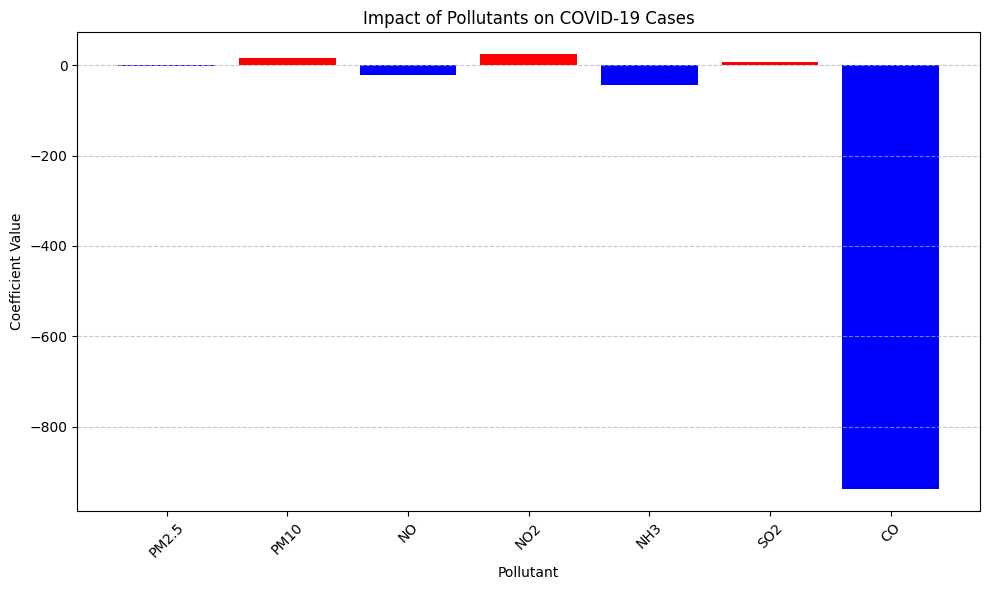

In [ ]:
import matplotlib.pyplot as plt

# Coefficient values
coefficients = [-1.646066, 16.851580, -21.443622, 24.604170, -44.594799, 6.046700, -938.626643]
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'SO2', 'CO']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(pollutants, coefficients, color=['blue' if c < 0 else 'red' for c in coefficients])
plt.xlabel("Pollutant")
plt.ylabel("Coefficient Value")
plt.title("Impact of Pollutants on COVID-19 Cases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


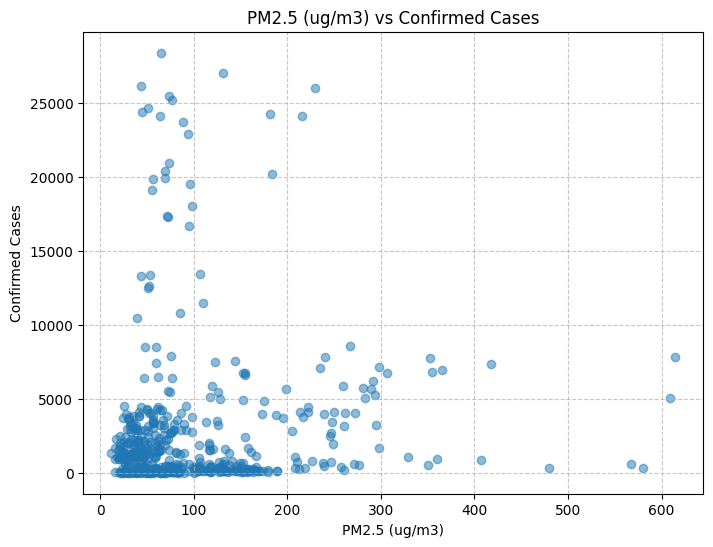

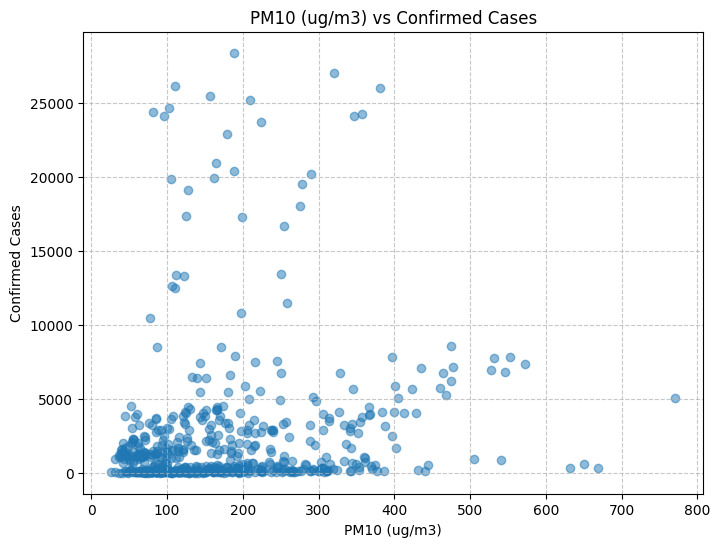

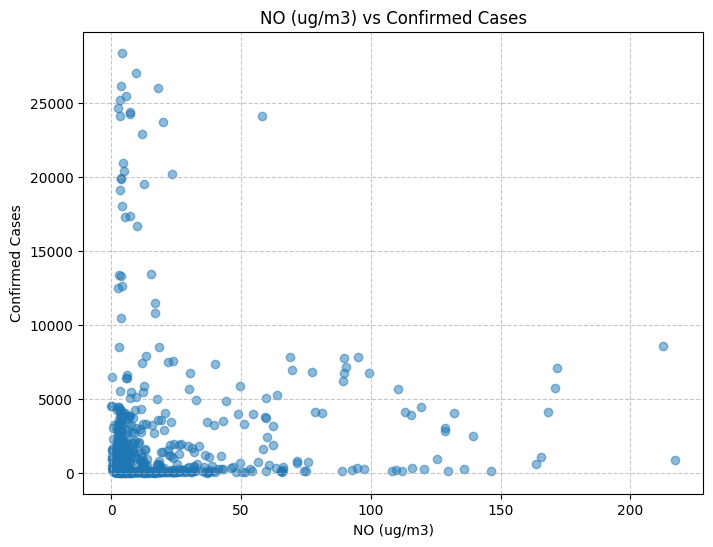

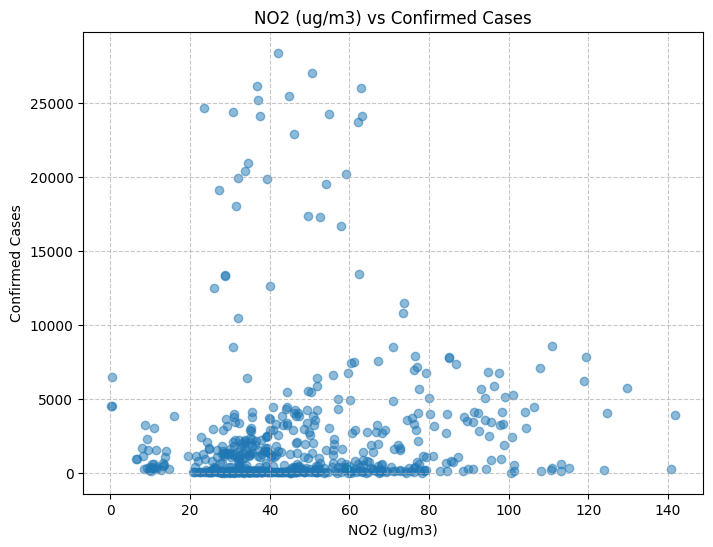

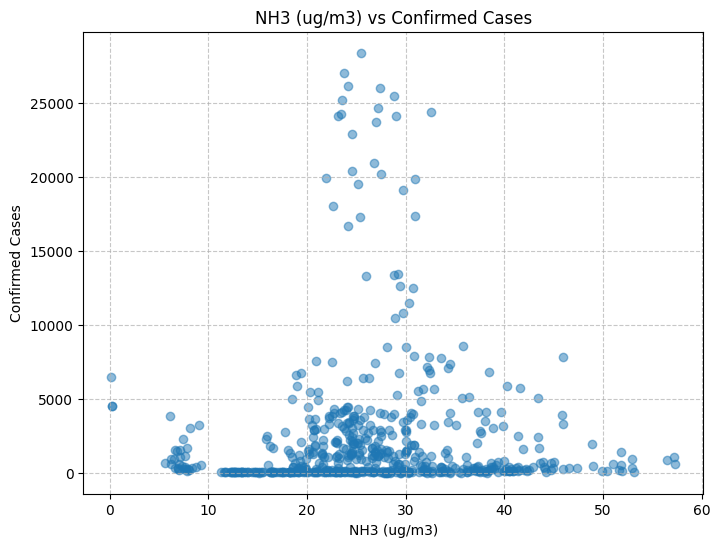

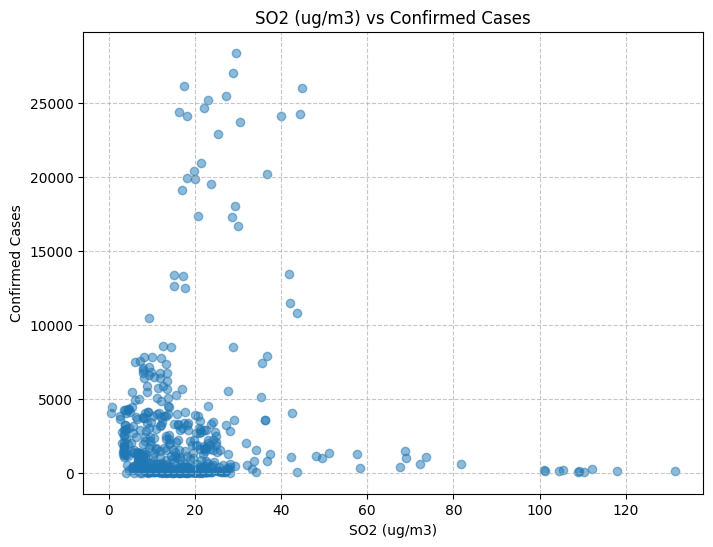

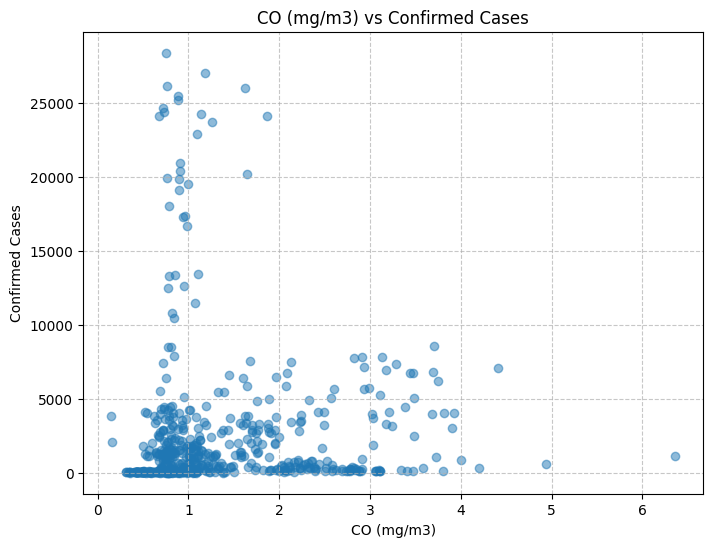

In [ ]:
import matplotlib.pyplot as plt

# List of pollutants
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

# Create individual scatter plots for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[pollutant], data['Confirmed'], alpha=0.5)
    plt.xlabel(pollutant)
    plt.ylabel('Confirmed Cases')
    plt.title(f'{pollutant} vs Confirmed Cases')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


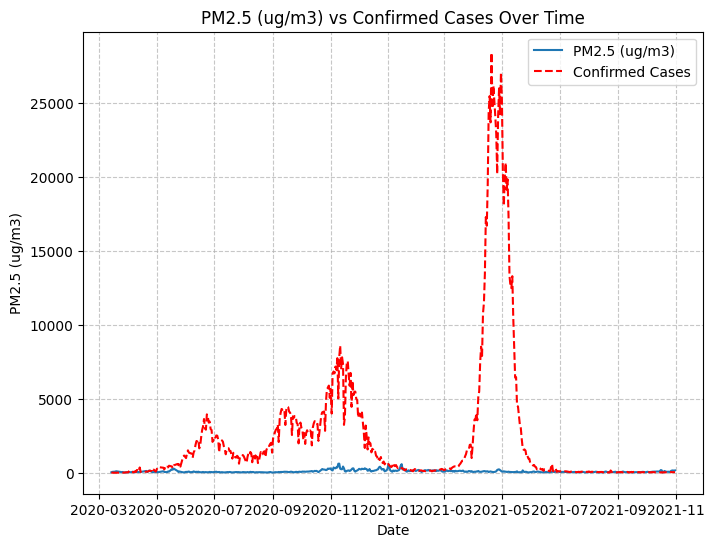

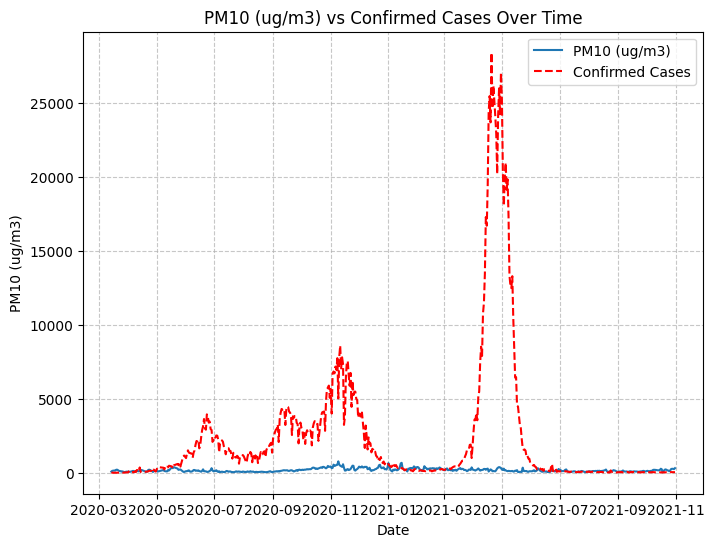

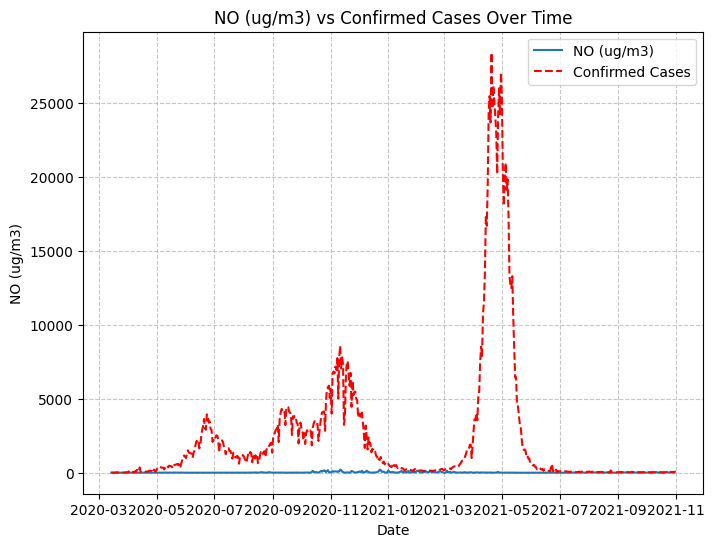

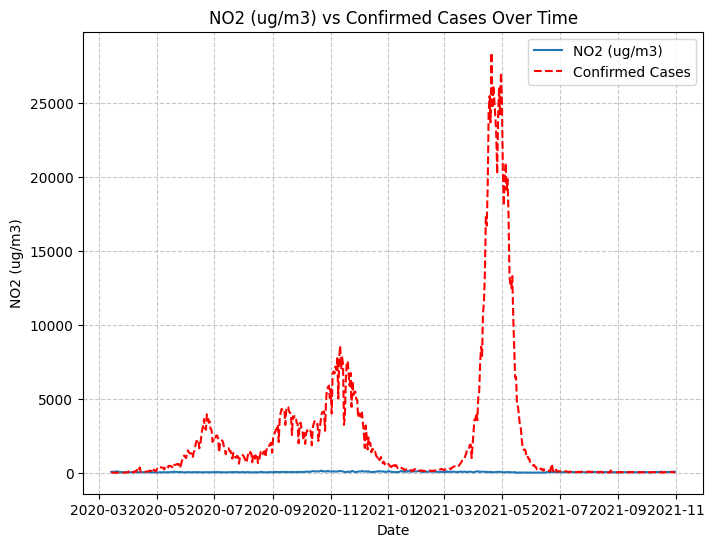

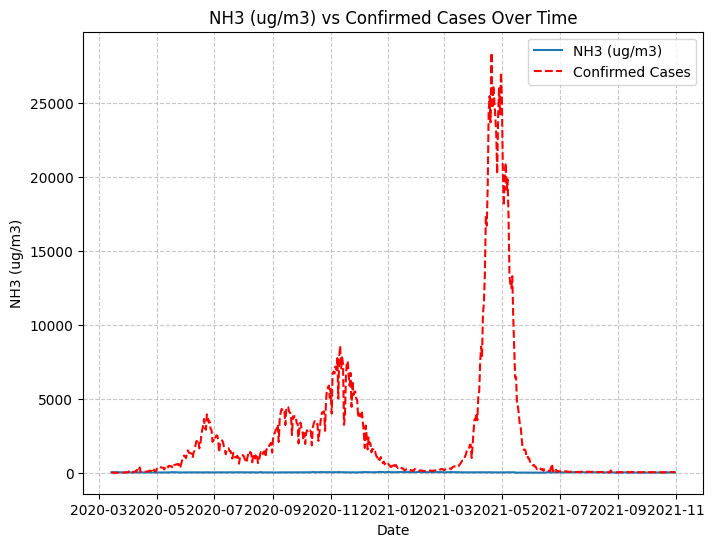

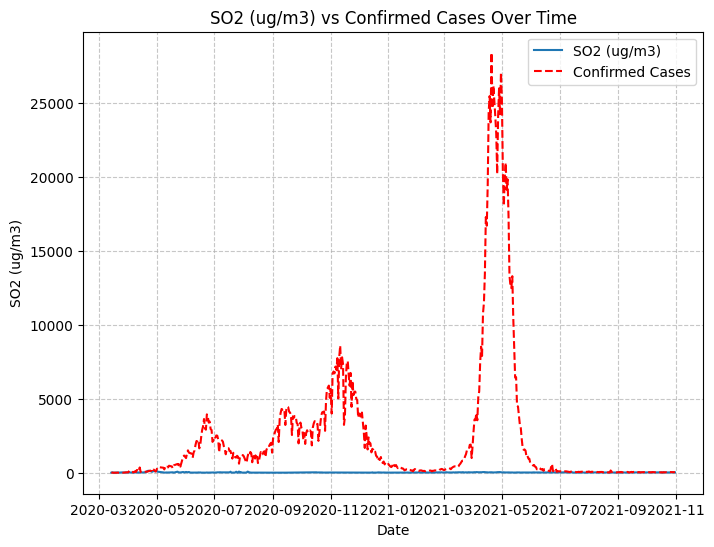

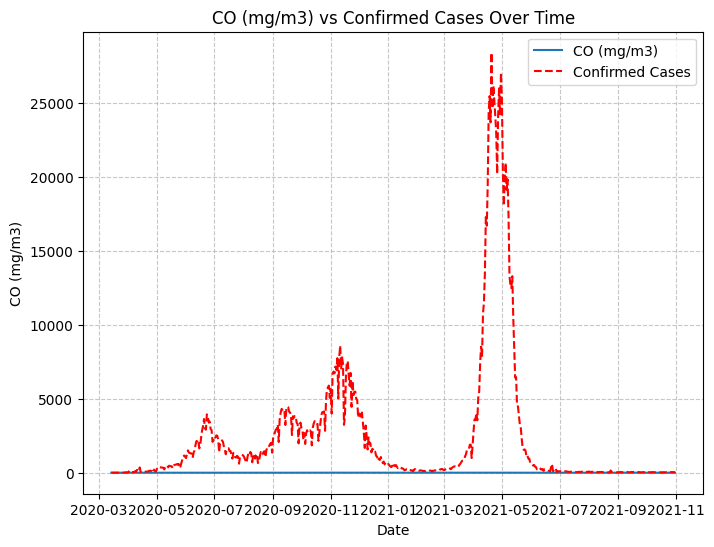

In [ ]:
import matplotlib.pyplot as plt

# List of pollutants
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

# Create individual line graphs for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(8, 6))
    plt.plot(data['Date'], data[pollutant], label=pollutant)
    plt.plot(data['Date'], data['Confirmed'], label='Confirmed Cases', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(pollutant)
    plt.title(f'{pollutant} vs Confirmed Cases Over Time')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


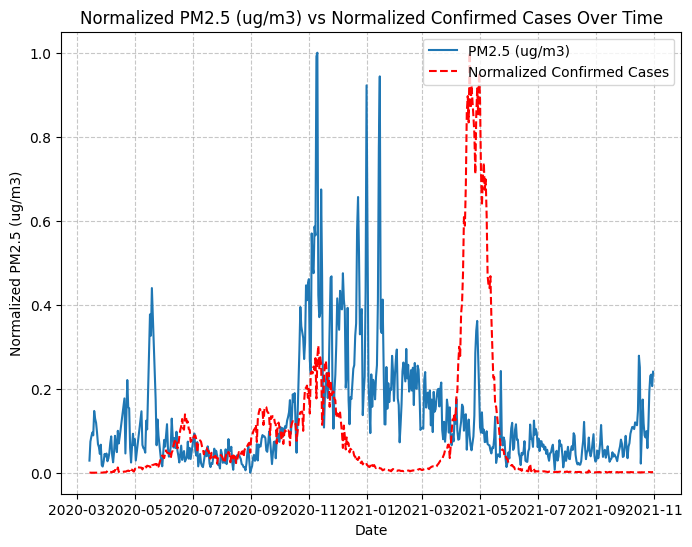

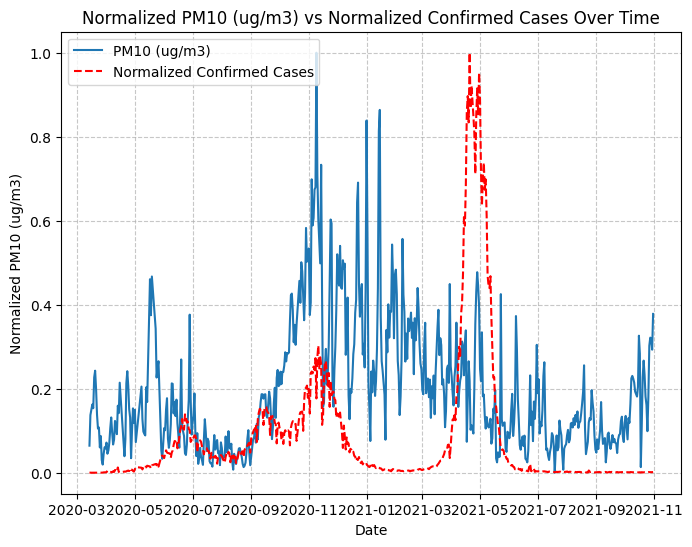

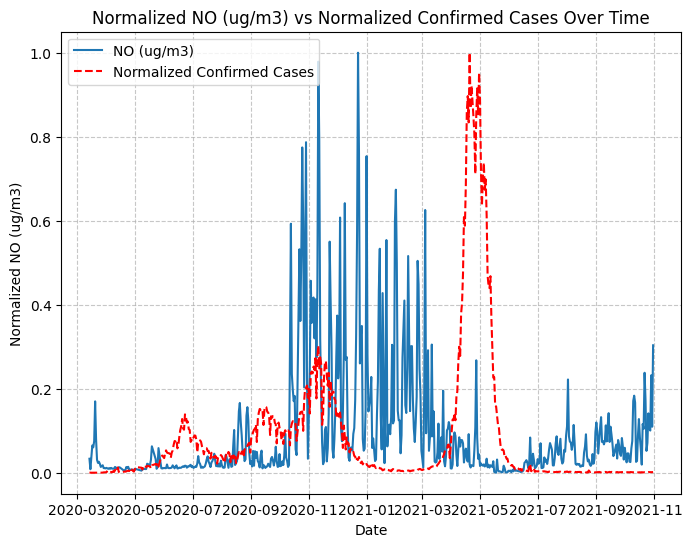

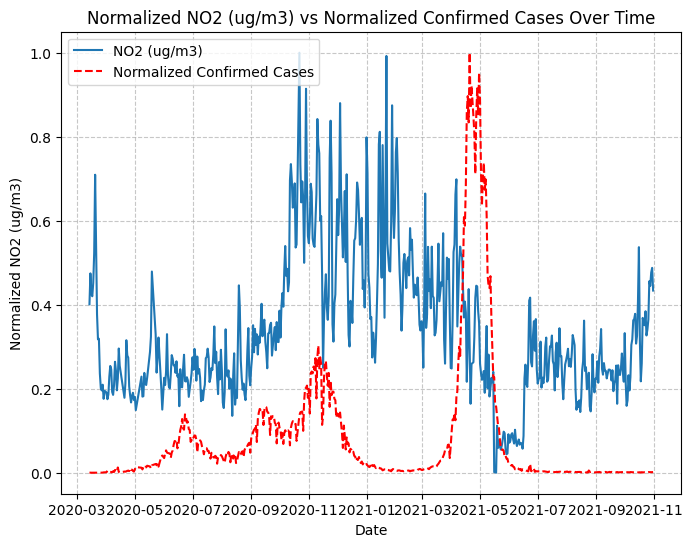

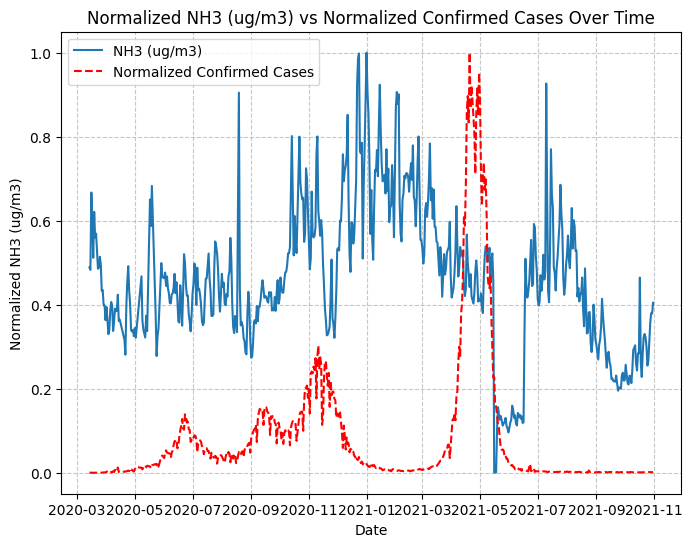

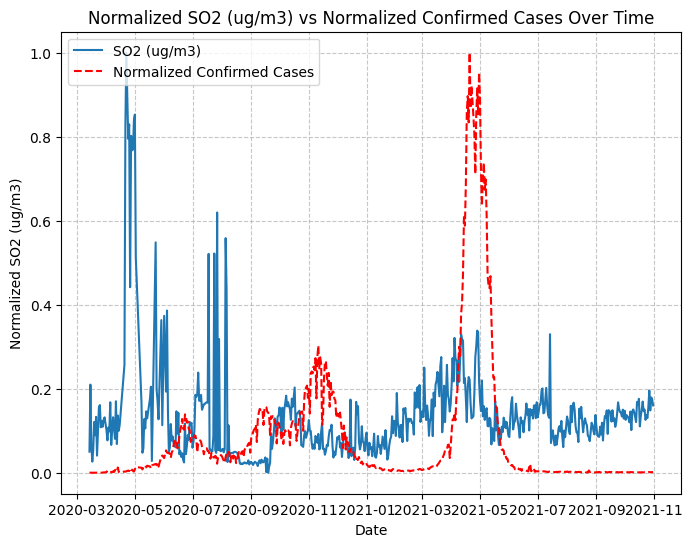

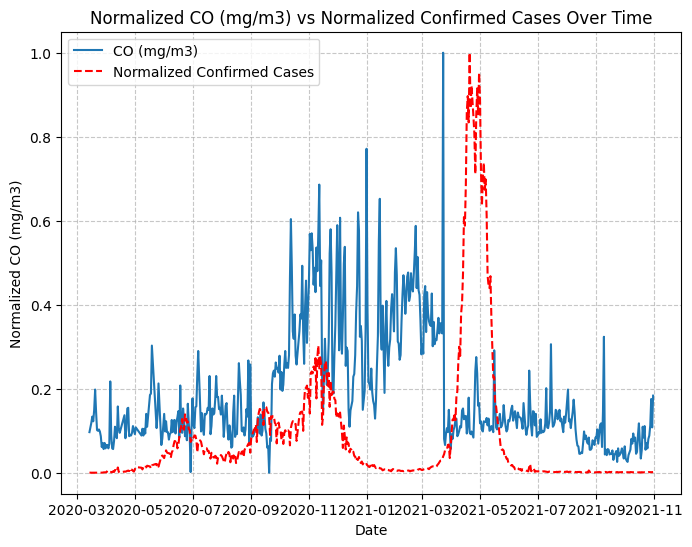

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# List of pollutants
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

# Copy the original data to avoid modifying the original DataFrame
normalized_data = data.copy()

# Normalize the "Confirmed" cases and pollutant data
scaler = MinMaxScaler()
normalized_data['Confirmed'] = scaler.fit_transform(data['Confirmed'].values.reshape(-1, 1))
for pollutant in pollutants:
    normalized_data[pollutant] = scaler.fit_transform(data[pollutant].values.reshape(-1, 1))

# Create individual line graphs for each normalized pollutant and normalized confirmed cases
for pollutant in pollutants:
    plt.figure(figsize=(8, 6))
    plt.plot(data['Date'], normalized_data[pollutant], label=pollutant)
    plt.plot(data['Date'], normalized_data['Confirmed'], label='Normalized Confirmed Cases', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(f'Normalized {pollutant}')
    plt.title(f'Normalized {pollutant} vs Normalized Confirmed Cases Over Time')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


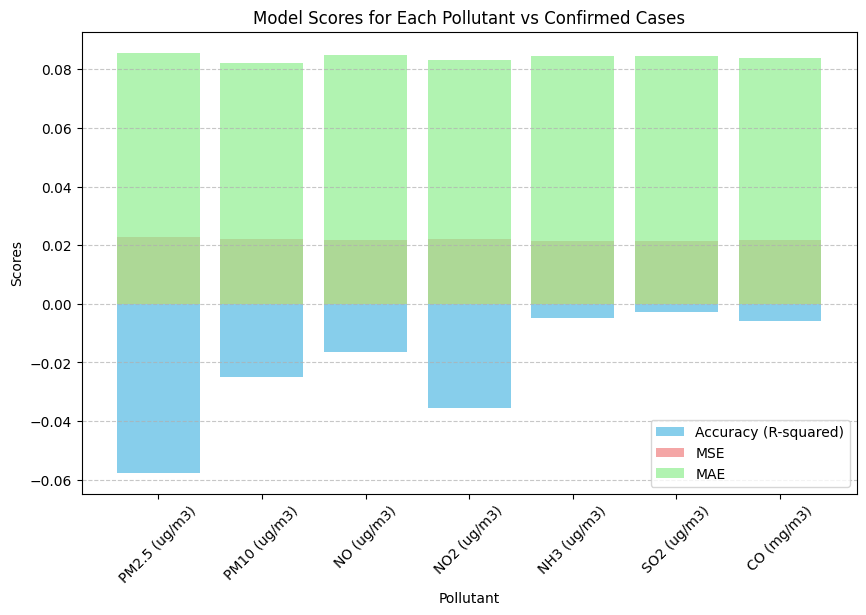

       Pollutant  Accuracy       MSE       MAE
0  PM2.5 (ug/m3) -0.057609  0.022729  0.085685
1   PM10 (ug/m3) -0.024934  0.022027  0.082004
2     NO (ug/m3) -0.016452  0.021845  0.085012
3    NO2 (ug/m3) -0.035695  0.022258  0.083081
4    NH3 (ug/m3) -0.004843  0.021595  0.084542
5    SO2 (ug/m3) -0.002640  0.021548  0.084722
6     CO (mg/m3) -0.005853  0.021617  0.083767


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
scores = {'Pollutant': [], 'Accuracy': [], 'MSE': [], 'MAE': []}
# Loop through each pollutant
for pollutant in pollutants:
    X = normalized_data[[pollutant]]
    y = normalized_data['Confirmed']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy (R-squared score)
    accuracy = r2_score(y_test, y_pred)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Store the scores in the dictionary
    scores['Pollutant'].append(pollutant)
    scores['Accuracy'].append(accuracy)
    scores['MSE'].append(mse)
    scores['MAE'].append(mae)

# Create a DataFrame from the scores dictionary
scores_df = pd.DataFrame(scores)

# Plot bar graph for scores
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Pollutant'], scores_df['Accuracy'], color='skyblue', label='Accuracy (R-squared)')
plt.bar(scores_df['Pollutant'], scores_df['MSE'], color='lightcoral', label='MSE', alpha=0.7)
plt.bar(scores_df['Pollutant'], scores_df['MAE'], color='lightgreen', label='MAE', alpha=0.7)
plt.xlabel('Pollutant')
plt.ylabel('Scores')
plt.title('Model Scores for Each Pollutant vs Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the scores DataFrame
print(scores_df)

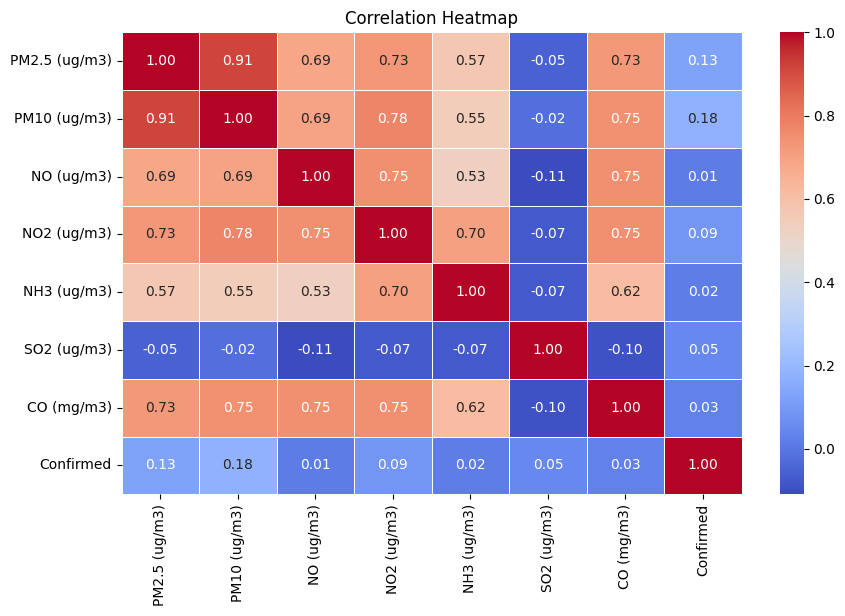

               PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
PM2.5 (ug/m3)       1.000000      0.913714    0.687836     0.730025   
PM10 (ug/m3)        0.913714      1.000000    0.694727     0.778220   
NO (ug/m3)          0.687836      0.694727    1.000000     0.751945   
NO2 (ug/m3)         0.730025      0.778220    0.751945     1.000000   
NH3 (ug/m3)         0.573983      0.549160    0.532384     0.704579   
SO2 (ug/m3)        -0.054124     -0.021143   -0.108873    -0.072198   
CO (mg/m3)          0.725304      0.746957    0.749493     0.750016   
Confirmed           0.125929      0.178811    0.014240     0.087489   

               NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Confirmed  
PM2.5 (ug/m3)     0.573983    -0.054124    0.725304   0.125929  
PM10 (ug/m3)      0.549160    -0.021143    0.746957   0.178811  
NO (ug/m3)        0.532384    -0.108873    0.749493   0.014240  
NO2 (ug/m3)       0.704579    -0.072198    0.750016   0.087489  
NH3 (ug/m3)       1.000000    -0.07

In [ ]:
# List of pollutants
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

# Calculate the correlation matrix
correlation_matrix = normalized_data[pollutants + ['Confirmed']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Display the correlation table
print(correlation_matrix)

<ipython-input-15-179473753ec7>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores1 = model_scores1.append({'Model': 'Random Forest', 'Pollutant': pollutant, 'R-squared': rf_r2,
<ipython-input-15-179473753ec7>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores2 = model_scores2.append({'Model': 'Gradient Boosting', 'Pollutant': pollutant, 'R-squared': gb_r2,
<ipython-input-15-179473753ec7>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores1 = model_scores1.append({'Model': 'Random Forest', 'Pollutant': pollutant, 'R-squared': rf_r2,
<ipython-input-15-179473753ec7>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

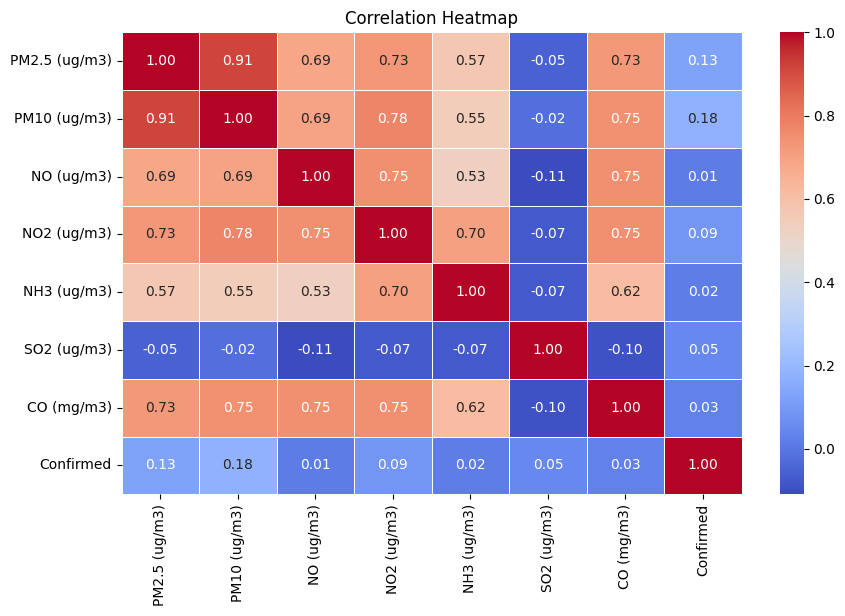

           Model      Pollutant  R-squared       MSE       MAE
0  Random Forest  PM2.5 (ug/m3)  -0.070355  0.023003  0.091454
1  Random Forest   PM10 (ug/m3)  -0.660322  0.035682  0.097553
2  Random Forest     NO (ug/m3)  -0.560653  0.033540  0.107959
3  Random Forest    NO2 (ug/m3)  -0.632910  0.035093  0.109207
4  Random Forest    NH3 (ug/m3)  -0.535922  0.033009  0.089417
5  Random Forest    SO2 (ug/m3)  -0.201619  0.025824  0.084310
6  Random Forest     CO (mg/m3)  -0.456594  0.031304  0.104112
               Model      Pollutant  R-squared       MSE       MAE
0  Gradient Boosting  PM2.5 (ug/m3)   0.047304  0.020474  0.082504
1  Gradient Boosting   PM10 (ug/m3)  -0.441959  0.030989  0.091316
2  Gradient Boosting     NO (ug/m3)  -0.344926  0.028904  0.099044
3  Gradient Boosting    NO2 (ug/m3)  -0.467592  0.031540  0.098619
4  Gradient Boosting    NH3 (ug/m3)  -0.383883  0.029741  0.084098
5  Gradient Boosting    SO2 (ug/m3)  -0.047565  0.022513  0.079552
6  Gradient Boosting     CO

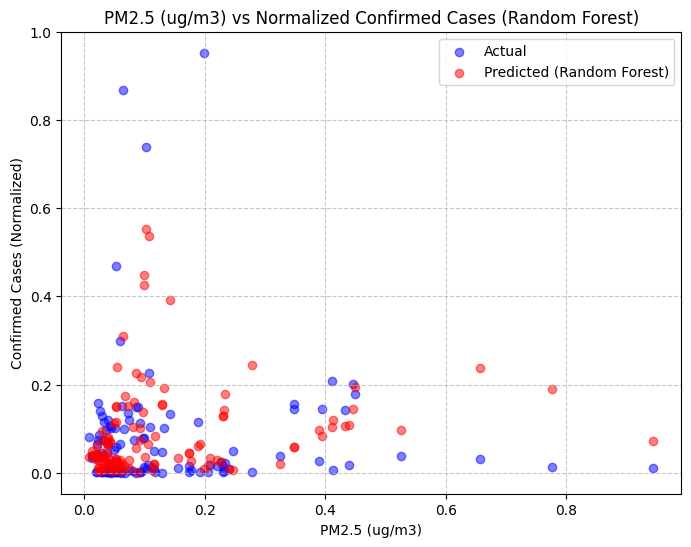

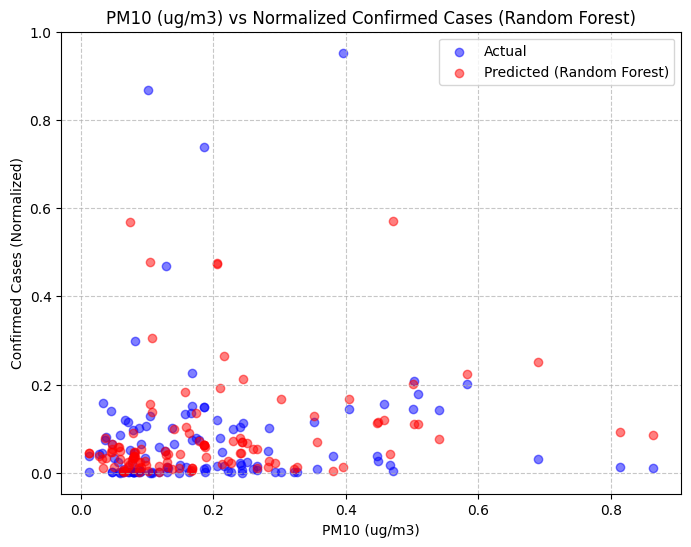

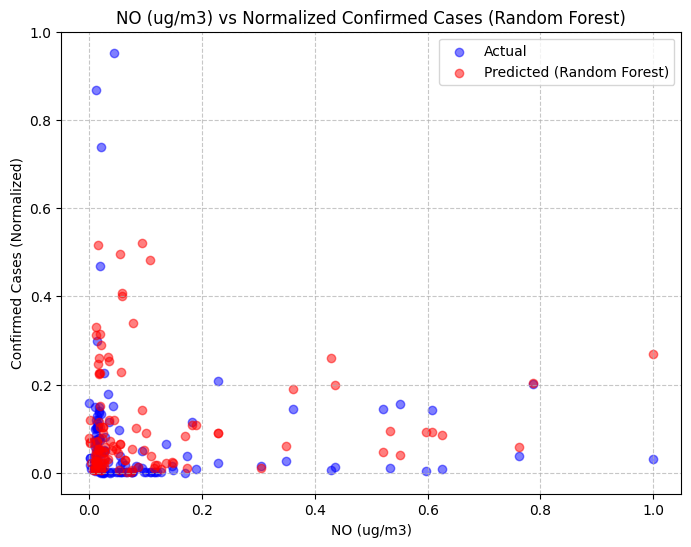

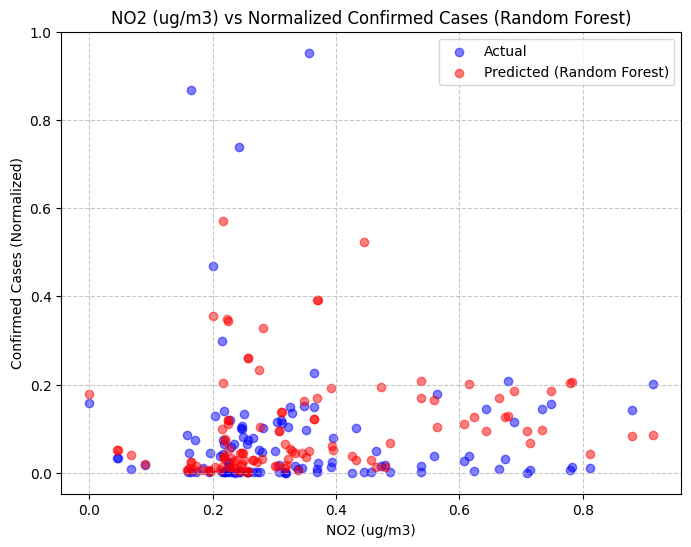

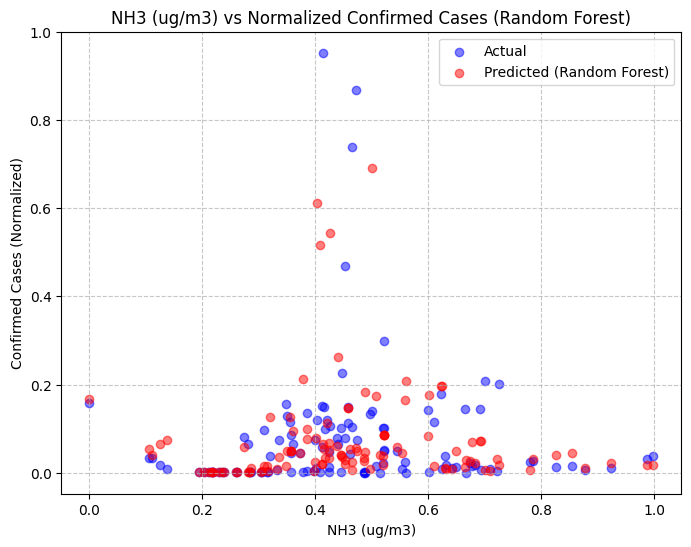

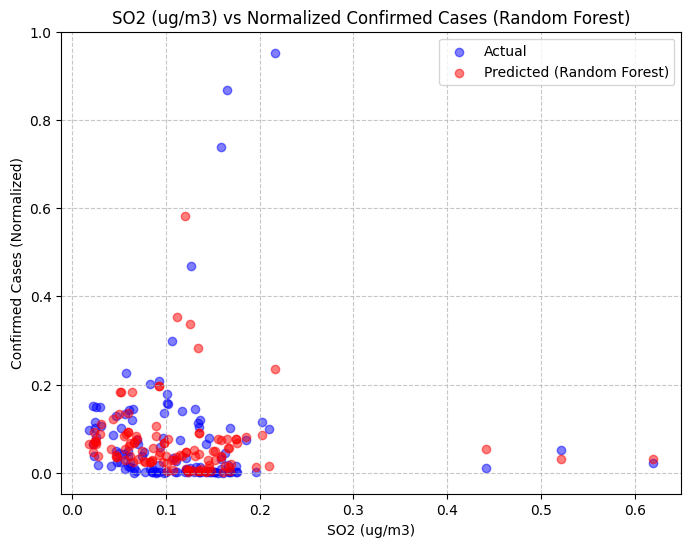

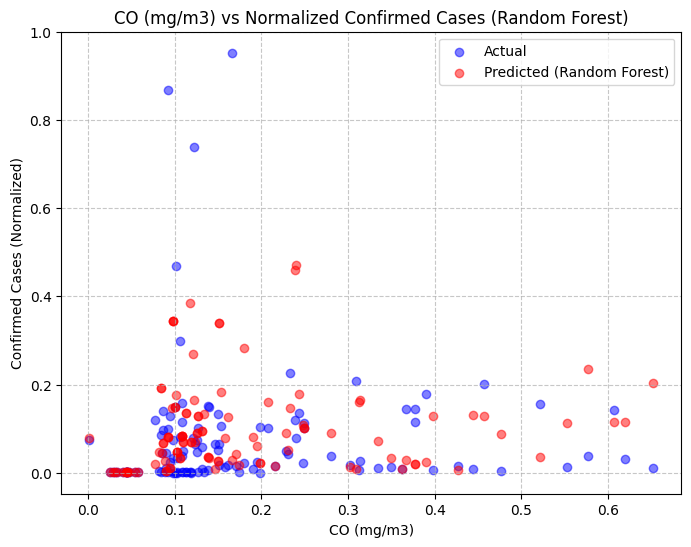

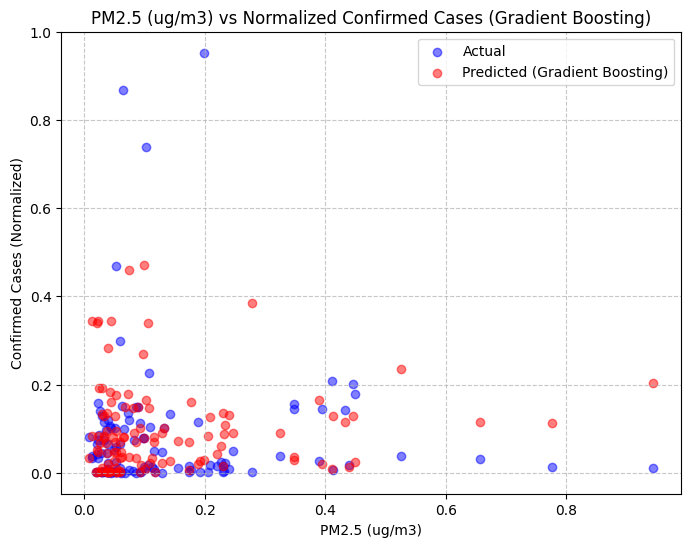

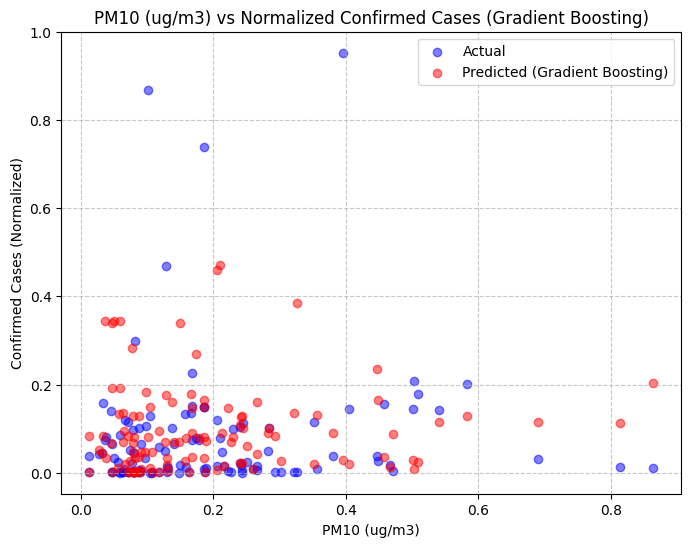

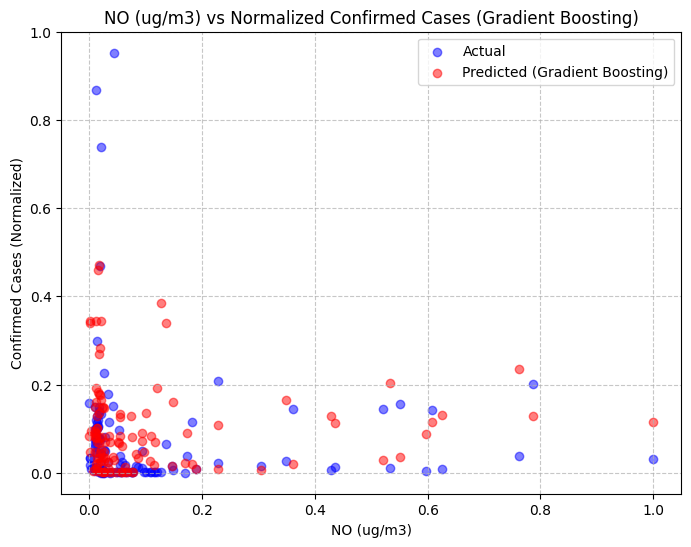

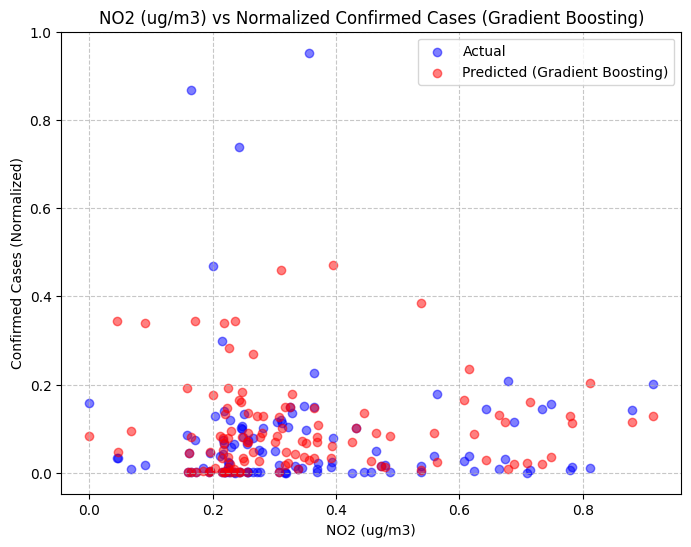

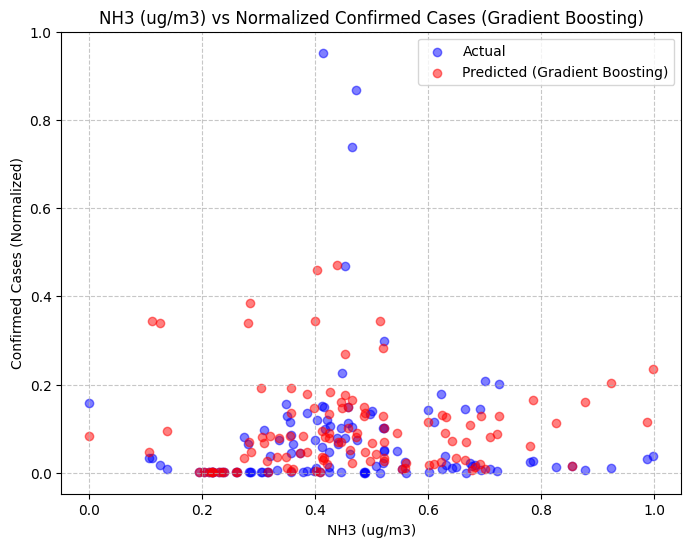

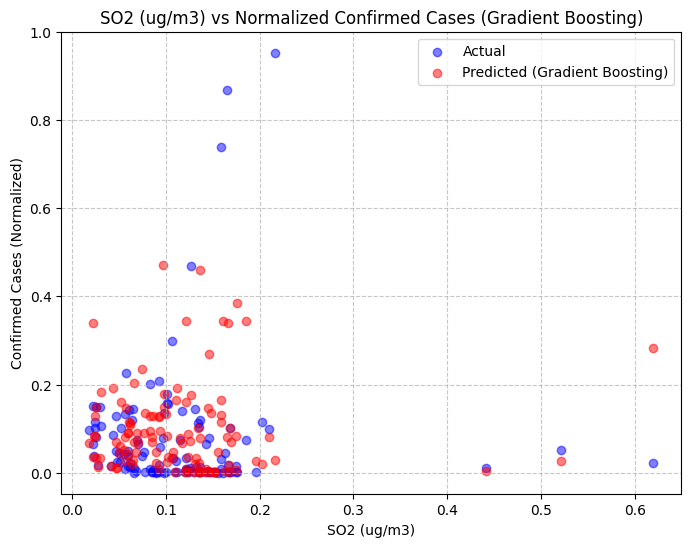

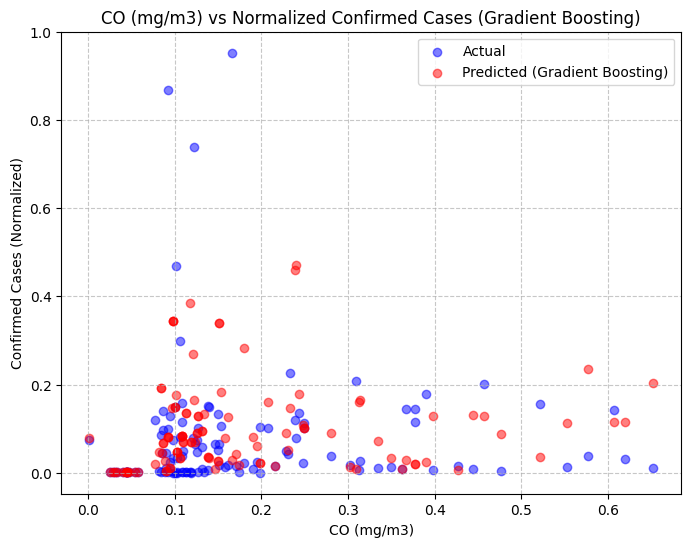

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# List of pollutants
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

# Create a DataFrame to store model scores
model_scores1 = pd.DataFrame(columns=['Model', 'Pollutant', 'R-squared', 'MSE', 'MAE'])
model_scores2 = pd.DataFrame(columns=['Model', 'Pollutant', 'R-squared', 'MSE', 'MAE'])

# Iterate through each pollutant and model
for pollutant in pollutants:
    X = normalized_data[[pollutant]]
    y = normalized_data['Confirmed']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the Random Forest Regressor model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Calculate scores for Random Forest
    rf_r2 = r2_score(y_test, rf_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)

    # Create and fit the Gradient Boosting Regressor model
    gb_model = GradientBoostingRegressor(random_state=42)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)

    # Calculate scores for Gradient Boosting
    gb_r2 = r2_score(y_test, gb_pred)
    gb_mse = mean_squared_error(y_test, gb_pred)
    gb_mae = mean_absolute_error(y_test, gb_pred)

    # Append the scores to the model_scores DataFrame
    model_scores1 = model_scores1.append({'Model': 'Random Forest', 'Pollutant': pollutant, 'R-squared': rf_r2,
                                        'MSE': rf_mse, 'MAE': rf_mae}, ignore_index=True)
    model_scores2 = model_scores2.append({'Model': 'Gradient Boosting', 'Pollutant': pollutant, 'R-squared': gb_r2,
                                        'MSE': gb_mse, 'MAE': gb_mae}, ignore_index=True)

# Create correlation heatmap
correlation_matrix = normalized_data[pollutants + ['Confirmed']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Print model scores
print(model_scores1)
print(model_scores2)

for pollutant in pollutants:
    X = normalized_data[pollutant].values.reshape(-1, 1)
    y = normalized_data['Confirmed']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit Random Forest Regressor
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Create scatterplot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.5)
    plt.scatter(X_test, rf_pred, label='Predicted (Random Forest)', color='red', alpha=0.5)
    plt.xlabel(pollutant)
    plt.ylabel('Confirmed Cases (Normalized)')
    plt.title(f'{pollutant} vs Normalized Confirmed Cases (Random Forest)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()



for pollutant in pollutants:
    X = normalized_data[pollutant].values.reshape(-1, 1)
    y = normalized_data['Confirmed']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit Gradient Boosting
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)

    # Create scatterplot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.5)
    plt.scatter(X_test, rf_pred, label='Predicted (Gradient Boosting)', color='red', alpha=0.5)
    plt.xlabel(pollutant)
    plt.ylabel('Confirmed Cases (Normalized)')
    plt.title(f'{pollutant} vs Normalized Confirmed Cases (Gradient Boosting)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

       Pollutant  Accuracy       MSE       MAE
0  PM2.5 (ug/m3) -0.057609  0.022729  0.085685
1   PM10 (ug/m3) -0.024934  0.022027  0.082004
2     NO (ug/m3) -0.016452  0.021845  0.085012
3    NO2 (ug/m3) -0.035695  0.022258  0.083081
4    NH3 (ug/m3) -0.004843  0.021595  0.084542
5    SO2 (ug/m3) -0.002640  0.021548  0.084722
6     CO (mg/m3) -0.005853  0.021617  0.083767

---



In [ ]:
        Pollutant  Accuracy       MSE       MAE
0  PM2.5 (ug/m3)  0.570609  0.022729  0.085685
1   PM10 (ug/m3)  0.024934  0.022027  0.082004
2     NO (ug/m3)  0.016452  0.021845  0.085012
3    NO2 (ug/m3)  0.035695  0.022258  0.083081
4    NH3 (ug/m3)  0.004843  0.021595  0.084542
5    SO2 (ug/m3)  0.002640  0.021548  0.084722
6     CO (mg/m3)  0.005853  0.021617  0.083767